In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
import keras.layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [ ]:
np.random.seed(0)
train, valid, test = pickle.load(open('dataset.pickle', 'rb'))
train = train.fillna(0)
valid = valid.fillna(0)
test = test.fillna(0)

In [3]:
x_train = train[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_train = train.iloc[:,-8:]
x_valid = valid[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_valid = np.asarray(valid.iloc[:,-8:])
x_test = test[['raw_acc','proc_gyro','raw_magnet','watch_acceleration','watch_heading', 'location', 'location_quick_features', 'audio_naive', 'audio_properties', 'discrete', 'lf_measurements']]
y_test = np.asarray(test.iloc[:,-8:])

In [4]:
scaler = MinMaxScaler() #scale features between 0 and 1
x_train = scaler.fit_transform(x_train)
#x_train = np.asarray(x_train).reshape(x_train.shape[0], 1, x_train.shape[1])
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)
#x_test = np.asarray(x_test).reshape(x_test.shape[0], 1, x_test.shape[1])

In [5]:
model = Sequential()
#model.add(LSTM(500, input_shape=(x_train.shape[1], x_train.shape[2]), bias_regularizer=L1L2(l1=0.01, l2=0.01)))
#model.add(LSTM(500, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(2000, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit([x_train], batch_size=100, y=y_train, verbose=1, validation_data=(x_valid, y_valid), 
          shuffle=True, epochs=20)

Train on 298911 samples, validate on 30026 samples
Epoch 1/20
298911/298911 [==============================] - 39s 131us/step - loss: 1.0679 - acc: 0.6240 - val_loss: 1.0206 - val_acc: 0.6430
Epoch 2/20
298911/298911 [==============================] - 37s 123us/step - loss: 0.9830 - acc: 0.6498 - val_loss: 1.5464 - val_acc: 0.5188
Epoch 3/20
298911/298911 [==============================] - 36s 122us/step - loss: 0.9396 - acc: 0.6643 - val_loss: 1.0005 - val_acc: 0.6314
Epoch 4/20
298911/298911 [==============================] - 36s 121us/step - loss: 0.9174 - acc: 0.6730 - val_loss: 1.0429 - val_acc: 0.6298
Epoch 5/20
298911/298911 [==============================] - 36s 121us/step - loss: 0.9026 - acc: 0.6780 - val_loss: 1.0129 - val_acc: 0.6512
Epoch 6/20
298911/298911 [==============================] - 36s 120us/step - loss: 0.8830 - acc: 0.6848 - val_loss: 1.0451 - val_acc: 0.6360
Epoch 7/20
298911/298911 [==============================] - 36s 121us/step - loss: 0.8699 - acc: 0.6895

In [7]:
predicted = model.predict(x_test)
predicted = np.argmax(predicted, axis=1)
y_test_decode = np.argmax(y_test, axis=1)
print(accuracy_score(y_test_decode, predicted))

0.45047408539734346


Train: 0.742, Valid: 0.647, Test: 0.450


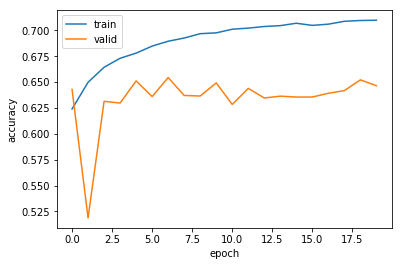

In [8]:
# evaluate the model
_, acc_train = model.evaluate(x_train, y_train, verbose=0)
_, acc_valid = model.evaluate(x_valid, y_valid, verbose=0)
_, acc_test = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f, Test: %.3f' % (acc_train, acc_valid, acc_test))
# learning curves of model accuracy
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
# save model
import os
dir_name = 'nn'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
filename = dir_name + '/2layers_val_20epoch_final.nn'
model.save(filename)
print('Saved %s' % filename)

Saved nn/2layers_val_20epoch_final.nn
